## 1. Google Play Store apps and reviews
<p>Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se están desarrollando cada vez más aplicaciones. En este ejercicio, haremos un análisis completo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información valiosa en los datos para diseñar estrategias que impulsen el crecimiento y la retención.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>

In [6]:
# Importa las librerías de pandas y matplotlin
import pandas as pd
import matplotlib.pyplot as plt

# Importa el datase apps.csv
apps = pd.read_csv("../apps.csv")

# Borra todos los duplicados del dataset
apps =apps.drop_duplicates()

# Imprime el total de apps que se van a analizar que quedan (dimensión)
print('Total number of apps in the dataset = ', apps.shape)

# Imprime la estádistica descriptiva de resumen
estadisticas = apps.describe()
print(estadisticas)

# Vamos a echar un vistazo al DataFrame final
apps

Total number of apps in the dataset =  (9659, 13)
            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536625  1.831320e+06    21.827509
min       1.000000  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000
50%       4.300000  9.670000e+02    12.000000
75%       4.500000  2.940100e+04    28.000000
max       5.000000  7.815831e+07   100.000000


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con más frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La función <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperaríamos. Esto se debe a que la columna contiene algunos caracteres más que solo [0,9] dígitos. Idealmente, queremos que estas columnas fueran puramente numéricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Específicamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

In [7]:
# Lista de caracteres a eliminar
chars_to_remove = [',', '$', '+']
# Lista de las columnas a limpiar
cols_to_clean = ['Installs', 'Price', 'Size']
# Loop para cada columna
for col in cols_to_clean:
    apps[col] = apps[col].astype(str)
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una función lambda el caracter especial por un texto vacío ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype(float)

apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 3. Exploring App's categories
<p>Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas más rápida y fácilmente visibles en Google Play. Para mejorar la experiencia de búsqueda general, Google ha introducido el concepto de agrupar aplicaciones en categorías.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¿Qué categoría tiene la mayor participación de aplicaciones (activas) en el mercado?</li>
<li>¿Alguna categoría específica domina el mercado?</li>
<li>¿Qué categorías tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aquí <code>33</code> categorías unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> también están en el top.</p>

Number of categories =  33


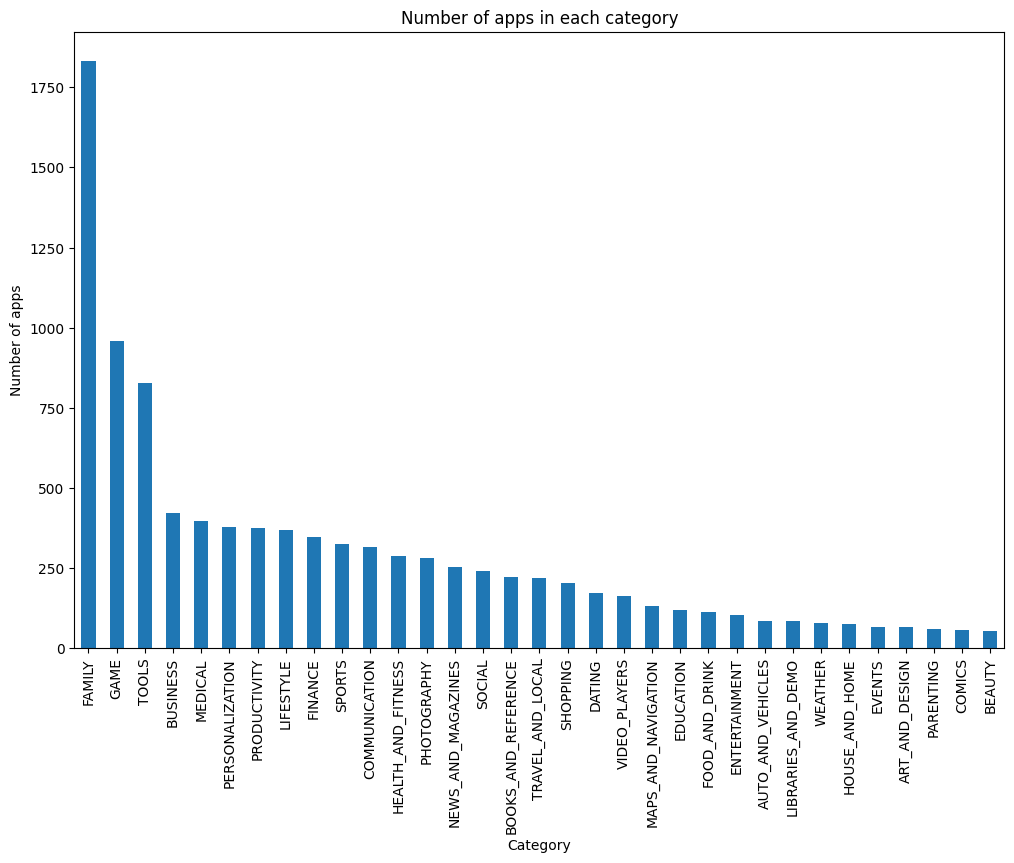

In [8]:
# Imprime el total de categorías únicas
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Cuenta el número de aplicaciones en cada Categoría y ordena de manera descendente 
num_apps_in_category = apps['Category'].value_counts()

# Muestra el resultado en una gráfica de barras
num_apps_in_category.plot(kind='bar', figsize=(12, 8))
plt.title('Number of apps in each category')
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.show()

## 4. Ratings Distribution
<p>Después de analizar la participación de mercado para cada categoría de las aplicaciones, veamos cómo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicación.</p>

Average app rating =  4.173243045387994
Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  

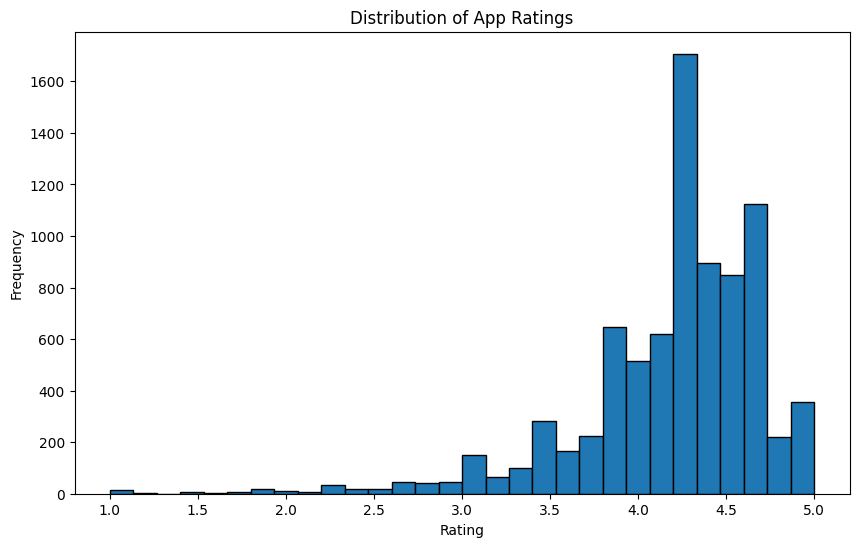

In [10]:
# Calcular el promedio de calificación de las apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Calcular el promedio de calificación por categoría
avg_rating_by_category = apps.groupby('Category')['Rating'].mean()
print(avg_rating_by_category)

# Visualizar en un histograma el comportamiento del Rating
plt.figure(figsize=(10, 6))
plt.hist(apps['Rating'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mercado objetivo es en países en vías de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¿El tamaño de una aplicación afecta su calificación?</li>
<li>¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¿El precio de una aplicación afecta su calificación? </li>
<li>¿Los usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

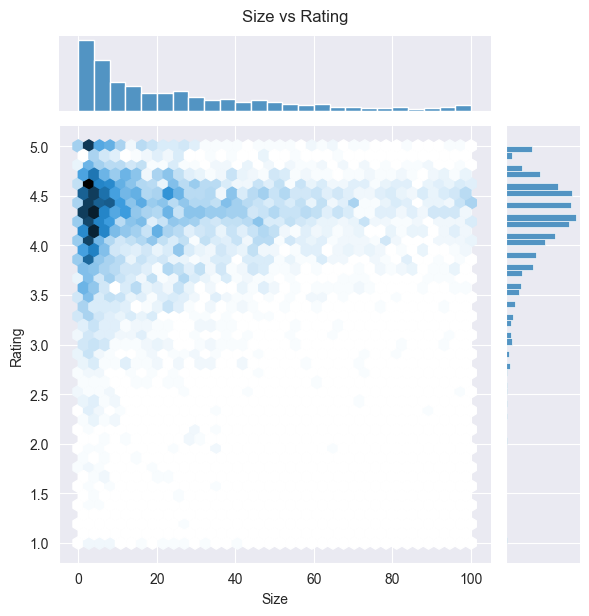

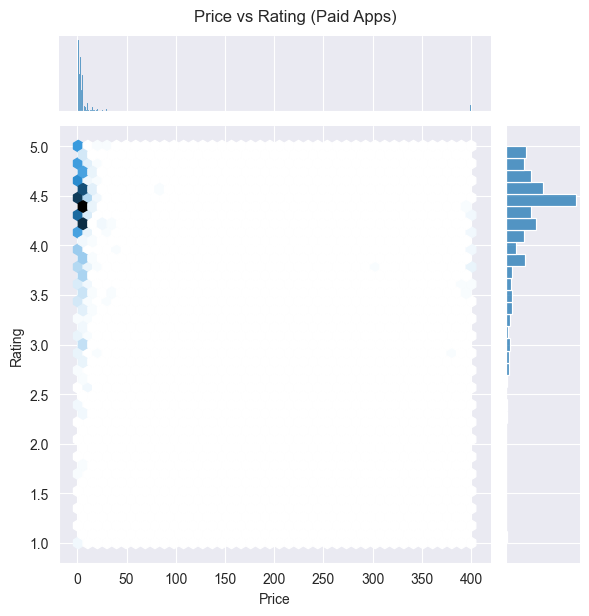

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps.dropna(subset=['Rating', 'Size'])

# Filtra las categorías con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Gráfica size vs. rating
plt1 = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'], kind='hex')
plt1.set_axis_labels('Size', 'Rating')
plt1.fig.suptitle('Size vs Rating', y=1.02)

# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Gráfica price vs. rating de las aplicaciones de paga
plt2 = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'], kind='hex')
plt2.set_axis_labels('Price', 'Rating')
plt2.fig.suptitle('Price vs Rating (Paid Apps)', y=1.02)

plt.show()


## 6. Relation between Category & Price
<p>Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposición de su cliente a pagar por la aplicación. Un precio elevado puede hacer que los clientes no se vean atraídos por descargarlaque ocurra la descarga o pueden eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos, así que vamos a descubrir y encontrar la respuesta</p>

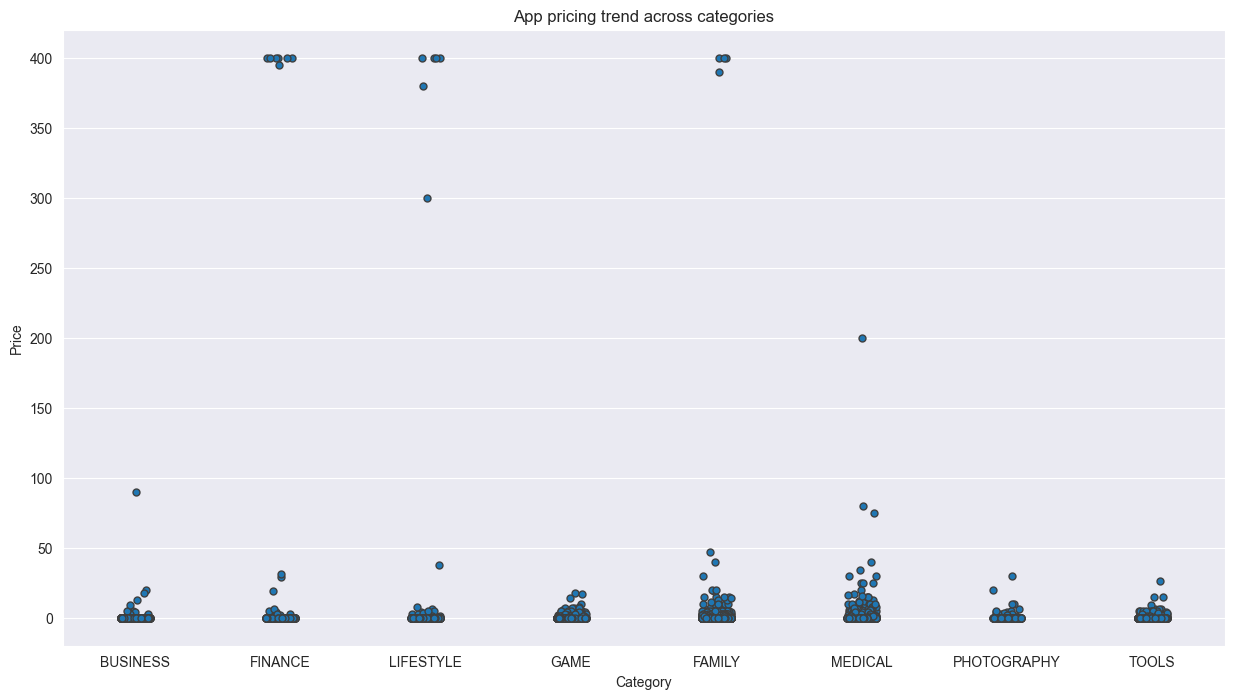

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño de la figura
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categorías populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categoría
ax = sns.stripplot(x=popular_app_cats['Category'], y=popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
ax.set_xlabel('Category')
ax.set_ylabel('Price')

# Selecciona las apps con un precio mayor a 200
apps_above_200 = apps[apps['Price'] > 200][['Category', 'App', 'Price']]

# Mostrar la gráfica
plt.show()

# Imprimir las apps con un precio mayor a 200
print(apps_above_200)

## 7. Sentiment analysis
<p>La minería de datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una técnica llamada análisis de sentimientos. Las reseñas de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral con respecto a esa aplicación. Por ejemplo, las palabras positivas en la revisión de una aplicación pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>


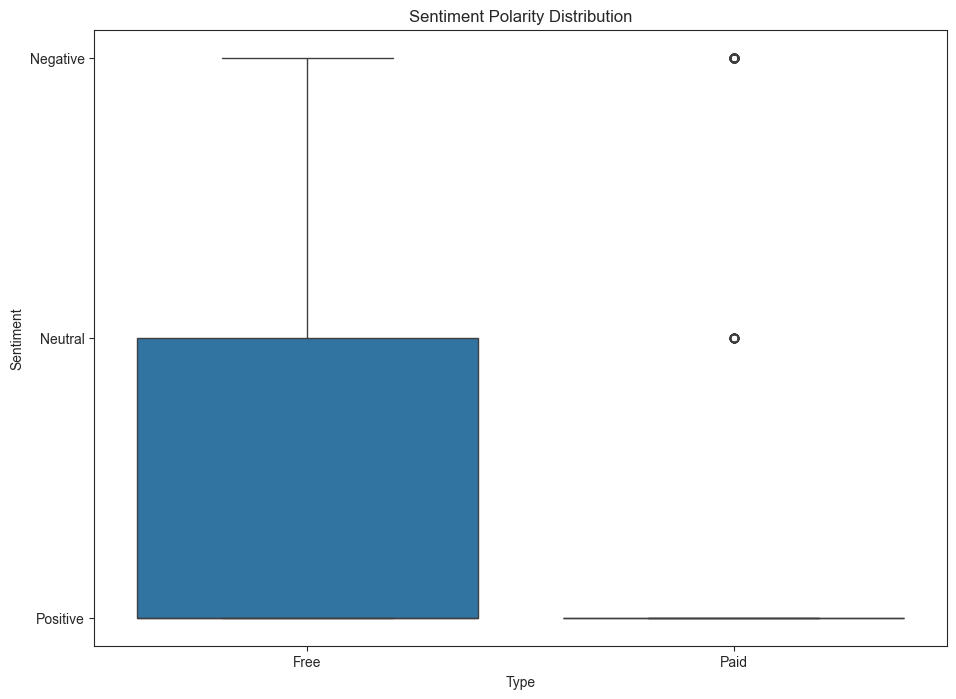

In [13]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv("../user_reviews.csv")

# Unir los DataFrames (join)
merged_df = pd.merge(apps, reviews_df, on='App')

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Graficar la polaridad de sentimientos para apps gratuitas y de paga
ax = sns.boxplot(x='Type', y='Sentiment', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')

plt.show()